<a href="https://colab.research.google.com/github/stixmal/praktikum_project_ds/blob/main/%D0%9F%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B0%20%D0%B8%D0%B3%D1%80%20%D0%B2%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82-%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B5/sales_of_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение условий успешности при продаже игр

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Доступны данные за 2016 г. Источник: `/datasets/games.csv`.

## Оглавление

### [1. Ознакомление с общей информацией](#1) <a id='10'></a>   

### [2. Подготовка данных](#2) <a id='20'></a>
+ [Замена типа данных и исправление ошибок](#2.1)  



+ [Определение суммарных продаж во всех регионах](#2.2)

### [3. Исследовательский анализ данных](#3) <a id='30'></a>
+ [Определение платформ с наибольшими суммарными продажами в разбивке по годам](#3.1)  


+ [Определение актуального периода и потенциально прибыльных платформ](#3.2)  


+ [Глобальные продажи игр в разбивке по прибыльным платформам](#3.3)  


+ [Корреляция прибыльной платформы от оценок пользователей и критиков](#3.4)  


+ [Общее распределение по жанрам](#3.5)


### [4. Составление портрета пользователя каждого региона](#4) <a id='40'></a>
+ [Портрет пользователя Северной Америки](#4.1)


+ [Портрет пользователя Западной Европы](#4.2)  


+ [Портрет пользователя Японии](#4.3)


### [5. Проверка гипотез](#5) <a id='50'></a>
+ [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#5.1)  


+ [Средние пользовательские рейтинги жанров Action и Sports разные](#5.2) 


### [6. Общий вывод](#6) <a id='60'></a>
***


## 1. Ознакомление с общей информацией <a id='1'></a>   [^](#10) 

Изучим набор данных, предоставленный для анализа.

In [ ]:
# импорт библиотеки pandas
import pandas as pd    

# импорт библиотеки mathplot
import matplotlib.pyplot as plt

# импорт библиотеки math
import math as mt

# импорт библиотеки numpy
import numpy as np  

# импорт библиотеки статистики
from scipy import stats as st

# импорт модуля display
from IPython.display import display  

In [ ]:
# чтение файла с данными и визуальная оценка таблицы
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
# общая информация о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Разберём какую информацию содержат столбцы.

* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)


Количество значений  в столбцах различается. Множество столбцов имеют пропущенные значения.

###  Выводы
Наша таблица имеет пропуски в столбцах с различными типами данных. Попробуем разобраться, где можно внести коррективы для дальнейшего анализа и поиска решений вышепоставленных задач.
***

## 2. Подготовка данных <a id='2'></a>   [^](#10)

* ### Замена типа данных и исправление ошибок <a id='2.1'></a> [^](#10)

Привели к нижнему регистру названия столбцов.

In [ ]:
df.columns = [col.lower() for col in df.columns]

## `name`

In [ ]:
# привели к нижнему регистру
df['name'] = df['name'].str.lower()

In [ ]:
# удалили 2 пропущенные записи в столбце name
df = df.dropna(subset=['name']).reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## `platform`

In [ ]:
# привели к нижнему регистру
df['platform'] = df['platform'].str.lower()
df['platform']

0         wii
1         nes
2         wii
3         wii
4          gb
         ... 
16708     ps3
16709    x360
16710     psv
16711     gba
16712     psv
Name: platform, Length: 16713, dtype: object

## `year_of_release`

In [ ]:
# приведение к целочисленному виду
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16708    2016
16709    2006
16710    2016
16711    2003
16712    2016
Name: year_of_release, Length: 16713, dtype: Int64

## `genre`

In [ ]:
# просмотрели уникальные значения столбца с жанром
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Привели также к нижнему регистру данных столбец с жанрами игр.

In [ ]:
df['genre'] = df['genre'].str.lower()
df['genre']

0              sports
1            platform
2              racing
3              sports
4        role-playing
             ...     
16708          action
16709          sports
16710       adventure
16711        platform
16712      simulation
Name: genre, Length: 16713, dtype: object

## `critic_score`

Заполнение пропусков на логически обоснованную величину не представляется возможным, так как оценка критиков является чисто субъективным мнением.

In [ ]:
df['critic_score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16708     NaN
16709     NaN
16710     NaN
16711     NaN
16712     NaN
Name: critic_score, Length: 16713, dtype: float64

## `user_score`

Столбец с пользовательскими оценками также не полностью заполнен. Возможной причиной может являться не выгруженные данные, либо просто отсутствие релевантной оценки по тем или иным играм. У данного столбца объектный тип данных, хотя по логике должен быть вещественный или целочисленный тип. 

In [ ]:
# визуальная оценка уникальных значений
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
1.9       2
0.7       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Значение **`tbd`** занимает приблизительно 2500 строк. **`To be define`** говорит нам, что оценки подлежат уточнению и ещё не совсем определены. Заполнение их какими-либо экстраполированными данными также может сильно исказить истинную картину. Поэтому просто приведём к вещественному типу, применив метод `.to_numeric`. Тогда 2500 строк станут аналогичны пропущенным значениям.

In [ ]:
# приведение к вещественному типу данных
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


## `rating`

In [ ]:
# просмотрели уникальные значения столбца с рейтингом
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Написали функцию для перевода обозначений рейтинга ESRB в условно-числовой вариант.

In [ ]:
# функция для рейтинга ESRB
def to_number(row):
    if row == 'E':
        return 6
    if row == 'E10+':
        return 10
    if row == 'T':
        return 13
    if row == 'M':
        return 17
    
df['number_rating'] = df['rating'].apply(to_number)    


***

* ### Определение суммарных продаж во всех регионах <a id='2.2'></a> [^](#10)

Создали столбец с суммарными продажами во всех регионах.

In [ ]:
# функция для определения суммарных продаж
def to_sales(row):
    world = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
    return world

In [ ]:
# создание столбца
df['world_sales'] = df.apply(to_sales, axis=1)

In [ ]:
# визуально оценили общий вид таблицы
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,number_rating,world_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,6.0,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,6.0,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,6.0,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01
16709,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,0.01
16710,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01
16711,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.01


###  Выводы
Мы сделали предобработку данных в нашей таблице: привели к нижнему регистру названия столбцов и данных в самих столбцах, заменили объектный тип на вещественный. От замены пропусков в оценках критиков и пользователей отказались из-за логической невозможности заполнения каким-то экстраполированным значением. 
***

## 3. Исследовательский анализ данных <a id='3'></a>   [^](#10)

* ### Определение платформ с наибольшими суммарными продажами в разбивке по годам <a id='3.1'></a> [^](#10)

Посмотрели, сколько игр выпускалось в разные годы.

In [ ]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


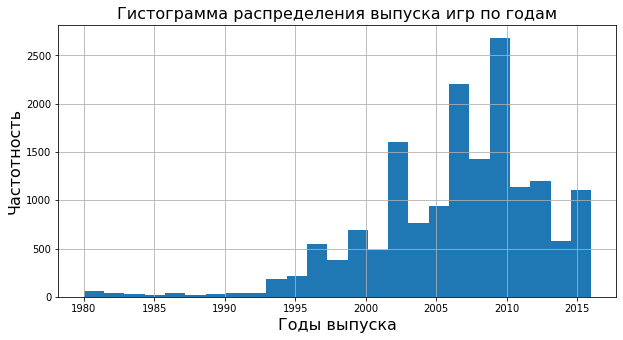

In [ ]:
# построили гистограмму распределения выпуска игр по всем годам
df.hist(column='year_of_release', bins=25, figsize=(10, 5))
plt.xlabel('Годы выпуска',  fontsize=16, fontweight='normal')
plt.ylabel('Частотность', fontsize=16, fontweight='normal')
plt.title('Гистограмма распределения выпуска игр по годам', fontsize=16, fontweight='normal')
plt.show()

Видим, что пики выхода игр достигают апогея в 2009-2010 годах. Далее идёт снижение количества выпускаемых игр. Возможно данный пик обусловлен выходом в свет следующего поколения игровых приставок от Sony и Microsoft.

Однако в желании ставки на популярный продукт необходимо руководствоваться не только вопросами недавней истории, но и актуальностью и своевременностью продаваемых игр. Поэтому посмотрели на временные отрезки, где господствуют уже актуальные игровые приставки, которые и будут продаваться в следующем году.

In [ ]:
# суммарные продажи по годам для разных платформ, начиная с 2011 года
df_sales = df.query('year_of_release > 2010').pivot_table(index=['platform','year_of_release'], \
values=['world_sales'], aggfunc='sum').sort_values(by=['year_of_release', 'world_sales'], ascending=False).head(100)
df_sales

,,world_sales
platform,year_of_release,
ps4,2016,69.25
xone,2016,26.15
3ds,2016,15.14
pc,2016,5.25
wiiu,2016,4.60
psv,2016,4.25
ps3,2016,3.60
x360,2016,1.52
wii,2016,0.18


Видим, что с выходом новых приставок "PS4" и "XBox One" в конце 2013 года, началось падение продаж других платформ и отвоёвывание доли новым поколением (данные за 2016 год будем считать неполными). Построили гистограммы и увидели данную ситуацию. 

## `PS4`

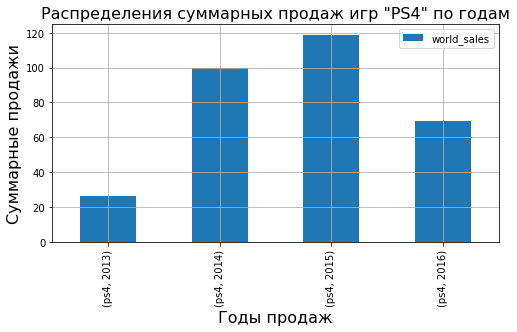

In [ ]:
# распределение продаж игр по годам для ps4
df.query('platform == "ps4"').pivot_table(index=['platform','year_of_release'], \
values=['world_sales'], aggfunc='sum').plot(kind='bar', y='world_sales', figsize=(8, 4), grid=True)
plt.xlabel('Годы продаж',  fontsize=16, fontweight='normal')
plt.ylabel('Суммарные продажи', fontsize=16, fontweight='normal')
plt.title('Распределения суммарных продаж игр "PS4" по годам', fontsize=16, fontweight='normal')
plt.show()

## `XONE`

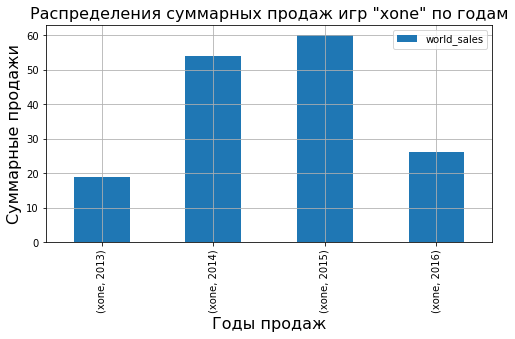

In [ ]:
# распределение продаж игр по годам для xone
df.query('platform == "xone"').pivot_table(index=['platform','year_of_release'], \
values=['world_sales'], aggfunc='sum').plot(kind='bar', y='world_sales', figsize=(8, 4), grid=True)
plt.xlabel('Годы продаж',  fontsize=16, fontweight='normal')
plt.ylabel('Суммарные продажи', fontsize=16, fontweight='normal')
plt.title('Распределения суммарных продаж игр "xone" по годам', fontsize=16, fontweight='normal')
plt.show()

## `3DS`

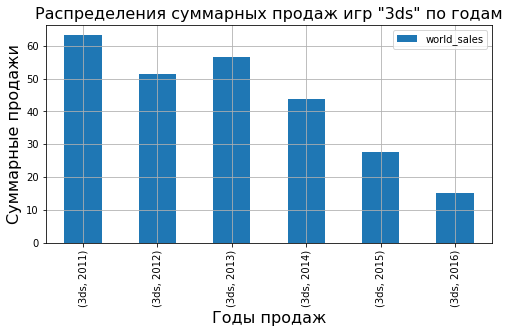

In [ ]:
# распределение продаж игр по годам для 3ds
df.query('platform == "3ds"').pivot_table(index=['platform','year_of_release'], \
values=['world_sales'], aggfunc='sum').plot(kind='bar', y='world_sales', figsize=(8, 4), grid=True)
plt.xlabel('Годы продаж',  fontsize=16, fontweight='normal')
plt.ylabel('Суммарные продажи', fontsize=16, fontweight='normal')
plt.title('Распределения суммарных продаж игр "3ds" по годам', fontsize=16, fontweight='normal')
plt.show()

## `WIIU`

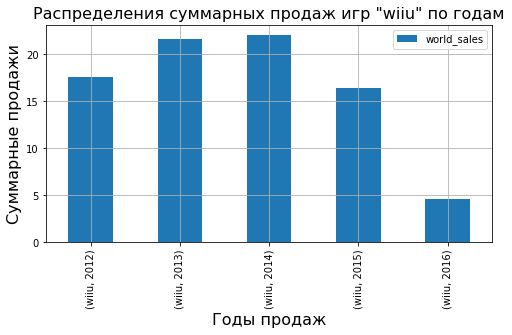

In [ ]:
# распределение продаж игр по годам для wiiu
df.query('platform == "wiiu"').pivot_table(index=['platform','year_of_release'], \
values=['world_sales'], aggfunc='sum').plot(kind='bar', y='world_sales', figsize=(8, 4), grid=True)
plt.xlabel('Годы продаж',  fontsize=16, fontweight='normal')
plt.ylabel('Суммарные продажи', fontsize=16, fontweight='normal')
plt.title('Распределения суммарных продаж игр "wiiu" по годам', fontsize=16, fontweight='normal')
plt.show()

## `PC`

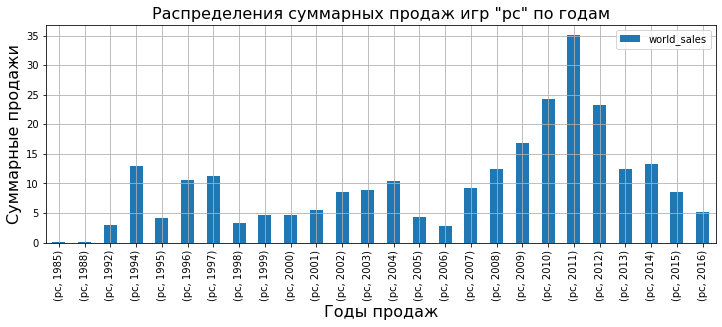

In [ ]:
# распределение продаж игр по годам для pc
df.query('platform == "pc"').pivot_table(index=['platform','year_of_release'], \
values=['world_sales'], aggfunc='sum').plot(kind='bar', y='world_sales', figsize=(12, 4), grid=True)
plt.xlabel('Годы продаж',  fontsize=16, fontweight='normal')
plt.ylabel('Суммарные продажи', fontsize=16, fontweight='normal')
plt.title('Распределения суммарных продаж игр "pc" по годам', fontsize=16, fontweight='normal')
plt.show()

Посмотрели также количество выпускаемых игр для компьютеров по годам, так как стационарный компьютер пока сложно списывать со счетов. Заметили, что при снижении общих суммарных продаж, количество выпускаемых игр не только не снижается, но и немного возрастает в последние 3 года.

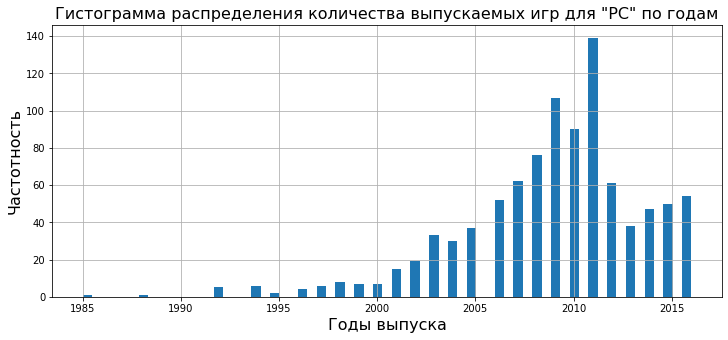

In [ ]:
# гистограмма распределения количества выпускаемых игр pc
df.query('platform == "pc"').hist(column='year_of_release', bins=65, figsize=(12, 5))
plt.xlabel('Годы выпуска',  fontsize=16, fontweight='normal')
plt.ylabel('Частотность', fontsize=16, fontweight='normal')
plt.title('Гистограмма распределения количества выпускаемых игр для "PC" по годам', fontsize=16, fontweight='normal')
plt.show()

## `PS3 и X360`

Прошлое поколение приставок PS3 и X360 также сдают позиции после выхода обновленных платформ.

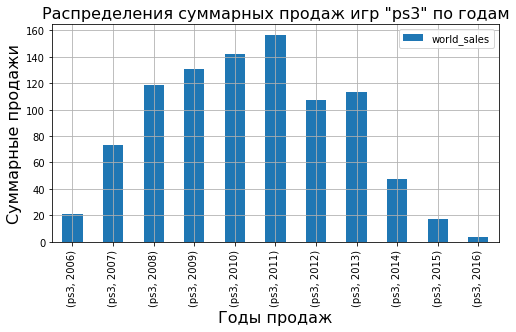

In [ ]:
# распределение продаж игр по годам для ps3
df.query('platform == "ps3"').pivot_table(index=['platform','year_of_release'], \
values=['world_sales'], aggfunc='sum').plot(kind='bar', y='world_sales', figsize=(8, 4), grid=True)
plt.xlabel('Годы продаж',  fontsize=16, fontweight='normal')
plt.ylabel('Суммарные продажи', fontsize=16, fontweight='normal')
plt.title('Распределения суммарных продаж игр "ps3" по годам', fontsize=16, fontweight='normal')
plt.show()

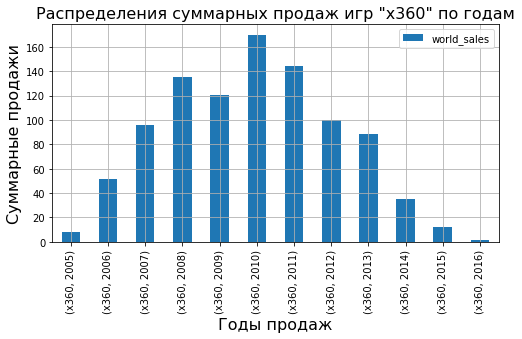

In [ ]:
# распределение продаж игр по годам для x360
df.query('platform == "x360"').pivot_table(index=['platform','year_of_release'], \
values=['world_sales'], aggfunc='sum').plot(kind='bar', y='world_sales', figsize=(8, 4), grid=True)
plt.xlabel('Годы продаж',  fontsize=16, fontweight='normal')
plt.ylabel('Суммарные продажи', fontsize=16, fontweight='normal')
plt.title('Распределения суммарных продаж игр "x360" по годам', fontsize=16, fontweight='normal')
plt.show()

***

* ### Определение актуального периода и потенциально прибыльных платформ <a id='3.2'></a> [^](#10)

Проанализировав полученные распределения, мы можем установить в качестве актуального периода срок,равный 3 годам, с момента выхода новых приставок Sony и Microsoft. Более ранние данные уже не имеют актуальности и не релевантны.  

В качестве потенциально прибыльных платформ мы выбрали: PS4, XOne, PC, 3DS. Две конкурирующие стационарные приставки, мобильная приставка и классические игры на компьютере находятся в разных группах пользования. Поэтому несмотря на снижающиеся объёмы продаж 3DS и PC, они также были выбраны в качестве "последнего вагона" уходящего поезда.)


In [ ]:
# создание среза актуальных данных с потенциально прибыльными платформами 
df_actual = df.query('year_of_release > 2013 and (platform == "ps4" or platform == "xone" or \
                     platform == "pc" or platform == "3ds")').reset_index(drop=True)
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,number_rating,world_sales
0,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
1,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,17.0,12.62
2,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,NaN,11.68
3,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,6.0,8.58
4,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,prison architect,xone,2016,action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,NaN,0.01
963,fujiko f. fujio characters: great assembly! sl...,3ds,2014,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01
964,metal gear solid v: the definitive experience,xone,2016,action,0.01,0.00,0.00,0.00,NaN,NaN,M,17.0,0.01
965,aikatsu stars! my special appeal,3ds,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01


***

* ### Глобальные продажи игр в разбивке по прибыльным платформам <a id='3.3'></a> [^](#10)

Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [ ]:
# числовое описание мировых продаж игр
df_actual['world_sales'].describe()

count    967.000000
mean       0.560745
std        1.280676
min        0.010000
25%        0.040000
50%        0.130000
75%        0.455000
max       14.630000
Name: world_sales, dtype: float64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


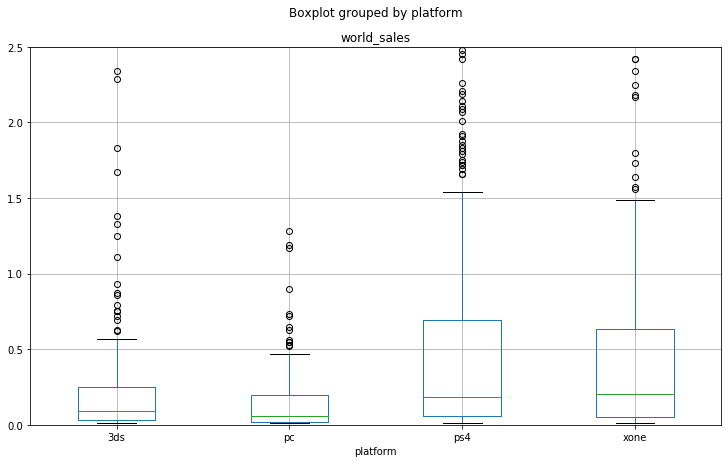

In [ ]:
# диаграмма размаха глобальных продаж игр по платформам
df_actual.boxplot('world_sales', by='platform', figsize=(12, 7))
plt.ylim(0, 2.5)
plt.show()

Числовое описание глобальных продаж говорит нам, что большинство игр укладывается в 0,5 млн проданных копий, судя по 3 квартилю. Однако медиана в разы меньше среднего, и выброс в 14 млн копий игры показывает наличие сверхпопулярных игровых предпочтений.  
При разбивке данных по платформам, диаграмма размаха существенно различает предпочтения игроков. Две игровых приставки PS4 и Xone захватывают на себя большинство популярных игр. Верхние усы у обеих приставок идут почти вровень - 1,5-межквартильный размах достигает 1,5 млн продаж. Также у обеих приставок есть множество выбросов в виде 2 млн и выше проданных игр. Это логично - все новые игры лучше выпускать на самых популярных платформах для увеличения охвата пользователей. Игры на 3DS и PC в среднем продаются меньшим числом копий - верхний ус в пределах 0,5 млн - даже несмотря на "выбросы" сверхуспешных игр за 1 млн. и выше.

Посмотрели долю сверхуспешных игр в общих продажах по платформам.

In [ ]:
# нахождение доли продаж сверхуспешных игр по платформам
sum_all = df_actual.pivot_table(index='platform', values=['world_sales'], aggfunc='sum')
sum_success = df_actual.query('world_sales > 1.7').pivot_table(index='platform', values=['world_sales'], aggfunc='sum')
share_sum = (sum_success / sum_all) * 100
share_sum.columns = ['world_sales%']
share_sum

,world_sales%
platform,
3ds,56.587448
pc,11.275416
ps4,68.065244
xone,51.859504


In [ ]:
# нахождение доли количества сверхуспешных игр по платформам
count_all = df_actual.pivot_table(index='platform', values=['name'], aggfunc='count')
count_success = df_actual.query('world_sales > 1.7').pivot_table(index='platform', values=['name'], aggfunc='count')
share_count = (count_success / count_all) * 100
share_count.columns = ['number_games%']
share_count

,number_games%
platform,
3ds,5.188679
pc,0.662252
ps4,13.297872
xone,9.649123


Для PS4 - 13 % выпущенных игр обеспечивают почти 70 % мировых продаж. Для Xone - 10 % выпущенных игр обеспечивают половину 50 % глобальной выручки. Как оказалось выбросы на диаграмме размаха не так просты, и иногда могут сказать больше, чем от них ожидалось.

***

* ### Корреляция прибыльной платформы от оценок пользователей и критиков <a id='3.4'></a> [^](#10)

Взяли самую популярную платформу PS4 и выявили зависимость прибыльности от оценок пользователей и критиков.

In [ ]:
# выбор ps4 в качестве образца для анализа
df_ps4 = df_actual.query('platform == "ps4"').reset_index(drop=True)

In [ ]:
# вызов матрицы корреляции для ps4
df_ps4[['world_sales', 'critic_score', 'user_score']].corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


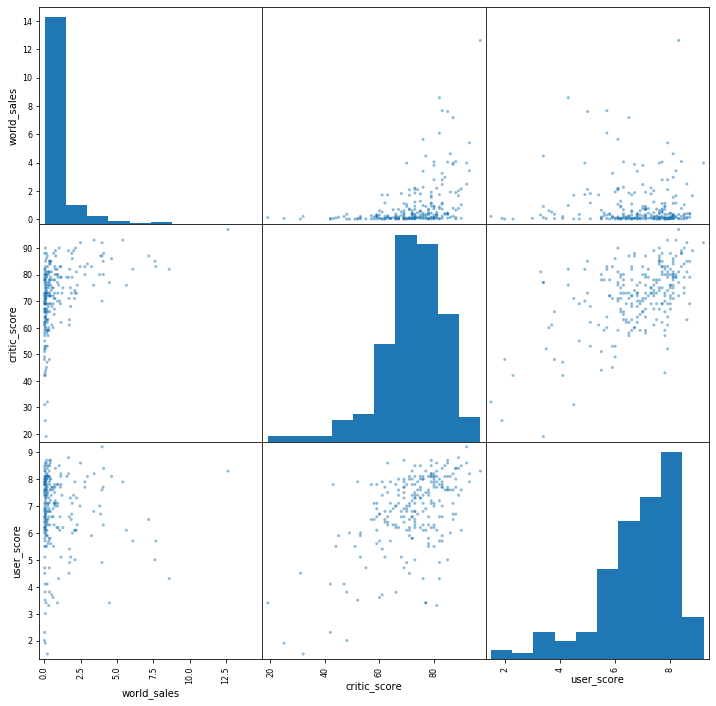

In [ ]:
# диаграммы корреляции между разными параметрами
pd.plotting.scatter_matrix(df_ps4[['world_sales', 'critic_score', 'user_score']], figsize=(12, 12))
plt.show()

Мы видим, что из числовых данных прямая корреляция между мировыми продажами игр о оценками критиков довольна сильна (0,4). Это говорит о субъективном факторе доверия мнениям профессиональных людей при покупке игры покупателями. Мнения же других игроков покупатели практически полностью игнорируют - корреляция ~ 0,04. 

In [ ]:
# вызов матрицы корреляции для xone
df_actual.query('platform == "xone"')[['world_sales', 'critic_score', 'user_score']].corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


In [ ]:
# вызов матрицы корреляции для 3ds
df_actual.query('platform == "3ds"')[['world_sales', 'critic_score', 'user_score']].corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


In [ ]:
# вызов матрицы корреляции для pc
df_actual.query('platform == "pc"')[['world_sales', 'critic_score', 'user_score']].corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.174634,-0.071597
critic_score,0.174634,1.000000,0.466099
user_score,-0.071597,0.466099,1.000000


Аналогичные выводы мы можем сделать и для приставки Xone - при покупке покупатели прислушиваются к мнению профессиональных критиков. Для мобильной приставки 3DS корреляции уже не столь очевидны, как и для игр, используемых на компьютере. У 3DS есть небольшая зависимость от мнения пользователей, но и в этом случае слабая связь мало спасает падающие продажи.

***

* ### Общее распределение по жанрам <a id='3.5'></a> [^](#10)

Нашли распределение по жанрам покупаемых игр.

In [ ]:
# распределение жанров продаваемых игр по платформам
df_actual.pivot_table(index=['platform', 'genre'], values=['world_sales'], aggfunc='sum')\
.sort_values(by=['platform', 'world_sales'], ascending=False)

world_sales
platform genre                    
xone     shooter             55.39
         action              31.06
         sports              23.68
         role-playing        10.55
         racing               6.89
         misc                 6.74
         adventure            2.68
         fighting             2.17
         platform             0.62
         simulation           0.33
         strategy             0.25
ps4      action              91.62
         shooter             78.46
         sports              50.01
         role-playing        28.99
         racing              10.16
         misc                 7.77
         fighting             7.73
         adventure            6.34
         platform             5.42
         simulation           1.23
         strategy             0.40
         puzzle               0.02
pc       simulation           6.59
         shooter              5.79
         action               5.34
         role-playing         4.87
         strategy             2.29
         sports               0.93
         racing               0.64
         adventure            0.39
         fighting             0.10
         platform             0.06
         misc                 0.05
3ds      role-playing        40.02
         action              22.06
         fighting             8.10
         simulation           4.13
         platform             3.98
         misc                 3.85
         adventure            1.57
         sports               1.32
         puzzle               0.87
         strategy             0.78

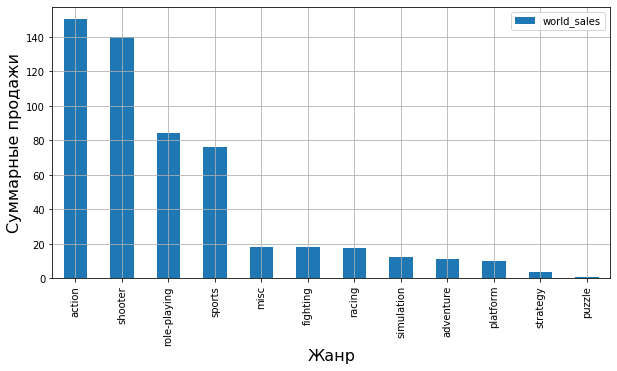

In [ ]:
# общее распределение совокупных продаж от жанров
df_actual.pivot_table(index=['genre'], values=['world_sales'], aggfunc='sum')\
.sort_values(by='world_sales', ascending=False).plot(kind='bar', y='world_sales', figsize=(10, 5), grid=True)
plt.xlabel('Жанр',  fontsize=16, fontweight='normal')
plt.ylabel('Суммарные продажи', fontsize=16, fontweight='normal')
plt.show()

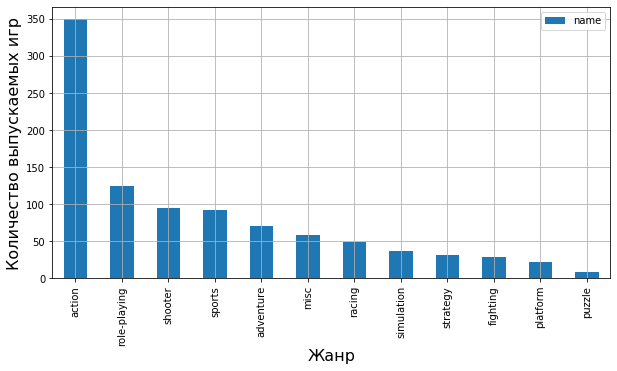

In [ ]:
# общее распределение выпускаемых игр по жанрам
df_actual.pivot_table(index=['genre'], values=['name'], aggfunc='count')\
.sort_values(by='name', ascending=False).plot(kind='bar', y='name', figsize=(10, 5), grid=True)
plt.xlabel('Жанр',  fontsize=16, fontweight='normal')
plt.ylabel('Количество выпускаемых игр', fontsize=16, fontweight='normal')
plt.show()

Общая совокупность мировых продаж распределяется по наиболее успешным жанрам игр. К таким относятся Action, Shooter, Role-Playing и Sports. Однако количество выпускаемых игр в Action в разы превышает количество выпускаемых игр других жанров, что говорит о популярности данного жанра среди геймеров. При рассмотрении распределения продаж по платформам находятся некоторые отличия. Например, на PC в популярных жанрах числится Simulation и Strategy, а на 3DS также Fighting. Скорее всего, данный факт можно объяснить различием пользовательского опыта (UE) в конструктивно-отличающихся платформах.

###  Выводы
Исследовательский анализ показал, что актуальность данных для прогноза имеет важную составляющую. Мы выбрали 3-летний период с момента выхода нового поколения приставок Sony и Microsoft. Львиную долю продаж всех игр составляют эти платформы. Причём для PS4 - 13 % выпущенных игр обеспечивают почти 70 % мировых продаж. Для Xone - 10 % выпущенных игр обеспечивают половину 50 % глобальной выручки каждой платформы. При покупке игр геймеры имеют склонность доверять профессиональной оценке критиков и не смотрят пользовательские комментарии. Чаще всего покупают игры жанров Action, Shooter, Role-Playing и Sports, хотя количество выпускаемых игр жанра Action несоизмеримо больше.
***

## 4. Составление портрета пользователя каждого региона <a id='4'></a>   [^](#10)

* ### Портрет пользователя Северной Америки <a id='4.1'></a> [^](#10)

Определили самые популярные платформы и жанры за 3 последних года.

In [ ]:
# топ-5 популярных платформ в Северной Америке
df.query('year_of_release > 2013').pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum')\
.sort_values(by='na_sales', ascending=False).head()

,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05


Видим, что суммарным итогом новые платформы отвоёвывают всё больше продаж в США. Прошлое поколение приставок уже почти в 4 раза меньше покупается игроками.
***

In [ ]:
# топ-5 популярных жанров в Северной Америке
df.query('year_of_release > 2013').pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum')\
.sort_values(by='na_sales', ascending=False).head()

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


А вот вкусовые пристрастия по жанрам держатся стабильно - всё также 4 главенствующих вида Action, Shooter, Role-Playing и Sports.
***

In [ ]:
# матрица корреляции между продажами в США и рейтингом ESRB
df.query('year_of_release > 2013')[['na_sales', 'number_rating']].corr() 

,na_sales,number_rating
na_sales,1.00000,0.09818
number_rating,0.09818,1.00000


Корреляция между продажами и рейтингом не прослеживается.
***

* ### Портрет пользователя Западной Европы <a id='4.2'></a> [^](#10)

Определили самые популярные платформы и жанры за 3 последних года.

In [ ]:
# топ-5 популярных платформ в Западной Европе
df.query('year_of_release > 2013').pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).head()

,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12


Суммарным итогом новые платформы держат лидерство и в Западной Европе. У европейцев также популярны игры на стационарном компьютере.
***

In [ ]:
# топ-5 популярных жанров в Западной Европе
df.query('year_of_release > 2013').pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).head()

,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


А вот вкусовые пристрастия по жанрам держатся стабильно - всё также 4 главенствующих вида Action, Shooter, Role-Playing и Sports.
***

In [ ]:
# матрица корреляции между продажами в Западной Европе и рейтингом ESRB
df.query('year_of_release > 2013')[['eu_sales', 'number_rating']].corr() 

,eu_sales,number_rating
eu_sales,1.000000,0.059192
number_rating,0.059192,1.000000


Корреляция между продажами и рейтингом не прослеживается.
***

* ### Портрет пользователя Японии <a id='4.3'></a> [^](#10)

In [ ]:
# топ-5 популярных платформ в Японии
df.query('year_of_release > 2013').pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False).head()

,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31


Местные игровые приставки корпораций Nintendo и Sony не дают шансов американцам. Весь пьедестал занят национальными платформами.
***

In [ ]:
# топ-5 популярных жанров в Японии
df.query('year_of_release > 2013').pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False).head()

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


"Стрелялки" у японцев не в таком высоком почёте, как у англоязычного мира, в отличие от того же "файтинга". 
***

In [ ]:
# матрица корреляции между продажами в Японии и рейтингом ESRB
df.query('year_of_release > 2013')[['jp_sales', 'number_rating']].corr() 

,jp_sales,number_rating
jp_sales,1.000000,-0.008214
number_rating,-0.008214,1.000000


Корреляция между продажами и рейтингом не прослеживается.
***

###  Выводы
Японский мир немного отличается от англоязычного. Это видно не только в занимаемых национальных платформах, но и в популярности тех или иных жанров игр. Например, жанр RPG куда более популярен в Японии, чем в США или Европе.
***

## 5. Проверка гипотез <a id='5'></a>   [^](#10)

* ### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a id='5.1'></a> [^](#10)

Сформулировали гипотезы, так чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти. Поэтому:  

- Будем считать для нулевой гипотезы $ H_0 $, что средние пользовательские рейтинги платформ **"Xbox One"** и **"PC"** равны.
- Тогда альтернативная гипотеза $ H_1 $ будет звучать как: "Средние пользовательские рейтинги платформ **"Xbox One"** и **"PC"** различаются".

Применили статистический тест о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [ ]:
# выборка из первой и второй генеральной совокупности пользовательских рейтингов

sample_1 = df_actual.query('platform == "xone" and user_score.notna()')['user_score'].reset_index(drop=True)
sample_2 = df_actual.query('platform == "pc" and user_score.notna()')['user_score'].reset_index(drop=True)

# проверили методом Бартлетта одинаковость дисперсий двух выборок
from scipy.stats import bartlett
stat, p = bartlett(sample_1, sample_2,)
print('p-значение Бартлетта:', p)

p-значение Бартлетта: 0.01113234705603591


Дисперсии двух выборок различаются.

In [ ]:
# критический уровень статистической значимости, меньше которого отвергнем нулевую гипотезу 
alpha = 0.05

# будем считать дисперсии выборок разными
results = st.ttest_ind(sample_1, sample_2, equal_var = False)   

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")    

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что с вероятностью 11 % средние генеральных совокупностей равны. Поэтому нулевая гипотеза не отвергается, т.е. средние пользовательские рейтинги платформ "Xbox One" и "PC" равны.

* ### Средние пользовательские рейтинги жанров Action и Sports разные  <a id='5.2'></a> [^](#10)

Применим в качестве нулевой гипотезы положительное определение о равенстве средних пользовательских рейтингов жанров Action и Sports:  

- Будем считать для нулевой гипотезы $ H_0 $, что средние пользовательские рейтинги жанров Action и Sports равны.
- Тогда альтернативная гипотеза $ H_1 $ будет: "Средние пользовательские рейтинги различаются".

Применили статистический тест о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [ ]:
# выборка из первой и второй генеральной совокупности пользовательских рейтингов

sample_1 = df_actual.query('genre == "action" and user_score.notna()')['user_score'].reset_index(drop=True)
sample_2 = df_actual.query('genre == "sports" and user_score.notna()')['user_score'].reset_index(drop=True)

# проверили методом Бартлетта одинаковость дисперсий двух выборок
from scipy.stats import bartlett
stat, p = bartlett(sample_1, sample_2,)
print('p-значение Бартлетта:', p)

p-значение Бартлетта: 0.06143892017814415


Дисперсии двух выборок различаются.

In [ ]:
# критический уровень статистической значимости, меньше которого отвергнем нулевую гипотезу 
alpha = 0.05

# будем считать дисперсии выборок разными
results = st.ttest_ind(sample_1, sample_2, equal_var = False)   

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")    

p-значение: 1.212959355403123e-07
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что  средние генеральных совокупностей различаются. Поэтому нулевая гипотеза отвергается и предлагается альтернативная, говорящая о различии средних рейтингов жанров Action и Sports.

###  Выводы
Мы проверили две гипотезы, используя статистический тест о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Данный тест показал одинаковость средних пользовательских рейтингов разных платформ и различие средних пользовательских рейтингов разных жанров.
***

## 6. Общий вывод <a id='6'></a>   [^](#10)

Мы определили некоторые закономерности для успешной продажи игр.  

- Изначально был получен датасет с выпускаемыми играми по годам и продажами по основным регионам мира.  


- Предварительно произвели замену типа данных, там, где это было необходимо. Рассчитали суммарные продажи для игр по всем регионам мира. От замены пропусков в оценках критиков и пользователей отказались из-за логической невозможности заполнения каким-то усреднённым значением.  


- В результате мы обнаружили следующие закономерности:  
    - Срок жизни игровых приставок определяется корпорациями и выход новой версии автоматически определяет будущие продажи игр. Актуальным периодом для этого является последние 3 года - время с выхода приставок Sony и Microsoft.
    - PS4 и X-box One являются главенствующими локомотивами продаж игр.
    - В контексте количества выпускаемых игр для приставок примерно десятая часть являются сверхуспешными в плане продаж и занимают более половины рынка.
    - Покупатели оглядываются на отзывы профессиональных критиков и не смотрят комментарии рядовых пользователей. Лейбл системы рейтинга ESRB мало на что влияет.
    - Чаще всего покупают игры жанров Action, Shooter, Role-Playing и Sports, хотя количество выпускаемых игр жанра Action несоизмеримо больше. В разрезе по регионам появляется специфика отличий азиатского мира от англоязычного - японские геймеры более увлекаются играми в жанре RPG нежели "шутерами". Также они поклонники жанра Fighting. Главенствующие приставки в Японии полностью распределены между национальными корпорациями Nintendo и Sony, так что "американцам" не остаётся места.
    - Проверка гипотез показала, что средние пользовательские рейтинги платформ X-Box One и PC одинаковы. Однако эти же рейтинги различаются в зависимости от жанра игры - Action или Sports.
    